# Exploratory Data Analysis on Google Play Store using Python

This dataset contains two files:
1. googleplaystore.csv : contains all the details of the applications on Google Play. There are 13 features that describe a given app.
2. googleplaystore_user_review.csv : contains 100 reviews for each app. The ranking is based on the contribution to the sentiment analysis. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In this dataset we will do data cleaning, data wrangling, univariate analysis, and bivariate analysis using python libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

In [2]:
g_data = pd.read_csv('googleplaystore.csv')

In [3]:
g_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
g_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
g_data.shape

(10841, 13)

In [6]:
g_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
g_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [8]:
g_data[g_data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [9]:
g_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
g_data.duplicated().sum()

483

There are 483 duplicated values, first we will drop all the duplicated values.

In [11]:
g_data.drop_duplicates(inplace = True)

In [12]:
g_data[g_data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Now we have drop all 483 duplicated values from data .

In [13]:
g_data.shape

(10358, 13)

In [14]:
g_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
g_data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

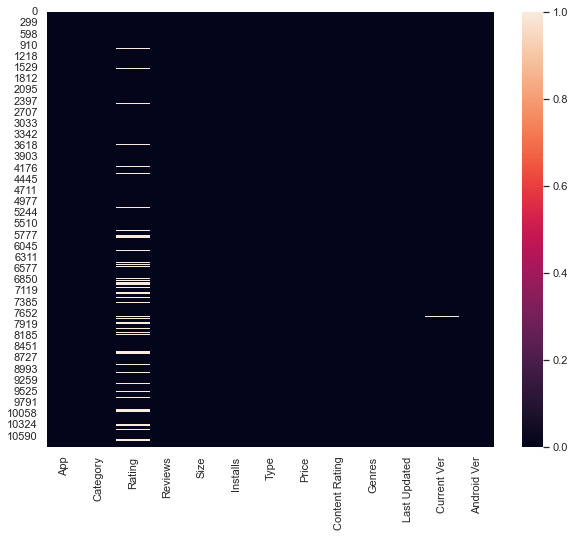

In [16]:
# Using heatmap to Show null values
plt.figure(figsize = (10, 8))
sns.heatmap(g_data.isnull())

The above correlation shows the null values in 'Rating' and 'Current Ver'.

In [17]:
g_data.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In google review data Rating is the only one column of numerical. In above describe Rating showing count, mean, std, min, max, median, 1st quartile and 2nd quartile.

In [18]:
g_review_data = pd.read_csv('googleplaystore_user_reviews.csv')
g_review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Merging both data g_data and g_review_data

In [19]:
final_data = pd.merge(g_data, g_review_data, on = 'App', how = 'left')

In [20]:
final_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109231,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN,NaN
109232,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,NaN,NaN,NaN,NaN
109233,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,NaN,NaN,NaN,NaN
109234,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [21]:
final_data.shape

(109236, 17)

In [22]:
final_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [23]:
final_data.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                    object
Size                       object
Installs                   object
Type                       object
Price                      object
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

There are two types of data types in this dataset:

float64: This float datatypes represents the numbers with decimal point. We have 3 floating variables which are Rating, Sentiment_Polarity, Sentiment_Subjectivity.

Object: Object are the categorical variables. And we have 14 object variables App, Category, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Translated_Review, Sentiment.

Now we will convert Reviews, Size, Installs, Price into float and last_Updated into datetime.

In [24]:
final_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [25]:
final_data[final_data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
108672,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN,NaN,NaN,NaN


In [26]:
final_data["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [27]:
final_data["Reviews"] = final_data["Reviews"].replace("0.0", 0)
final_data["Reviews"] = final_data.Reviews.replace('3.0M', 3000000.0)
final_data["Reviews"] = final_data["Reviews"].astype(float)
final_data['Reviews'].dtype

dtype('float64')

In [28]:
final_data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [29]:
final_data["Size"] = final_data["Size"].str.replace('M', '000')
final_data["Size"] = final_data["Size"].str.replace('k', '')
final_data["Size"] = final_data["Size"].replace('1,000+', 1000)
final_data["Size"] = final_data["Size"].replace("Varies with device", np.nan)
final_data["Size"] = final_data["Size"].astype(float)
final_data["Size"].dtype

dtype('float64')

In [30]:
final_data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [31]:
final_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [32]:
final_data["Installs"] = final_data["Installs"].str.replace('+', '')
final_data["Installs"] = final_data["Installs"].str.replace(',', '')
final_data["Installs"] = final_data["Installs"].replace('Free', np.nan)
final_data["Installs"] = final_data["Installs"].astype(float)
final_data["Installs"].dtype

dtype('float64')

In [33]:
final_data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [34]:
final_data["Price"] = final_data["Price"].str.replace("$", "")
final_data["Price"] = final_data["Price"].replace("Everyone", np.nan)
final_data["Price"] = final_data["Price"].astype(float)
final_data["Price"].dtype

dtype('float64')

In [35]:
final_data["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [36]:
final_data["Last Updated"] = final_data["Last Updated"].replace("1.0.19", np.nan)
final_data["Last Updated"] = pd.to_datetime(final_data["Last Updated"])
final_data["Last Updated"]

0        2018-01-07
1        2018-01-15
2        2018-01-15
3        2018-01-15
4        2018-01-15
            ...    
109231   2017-07-25
109232   2018-07-06
109233   2017-01-20
109234   2015-01-19
109235   2018-07-25
Name: Last Updated, Length: 109236, dtype: datetime64[ns]

In [37]:
final_data.dtypes

App                               object
Category                          object
Rating                           float64
Reviews                          float64
Size                             float64
Installs                         float64
Type                              object
Price                            float64
Content Rating                    object
Genres                            object
Last Updated              datetime64[ns]
Current Ver                       object
Android Ver                       object
Translated_Review                 object
Sentiment                         object
Sentiment_Polarity               float64
Sentiment_Subjectivity           float64
dtype: object

<AxesSubplot:>

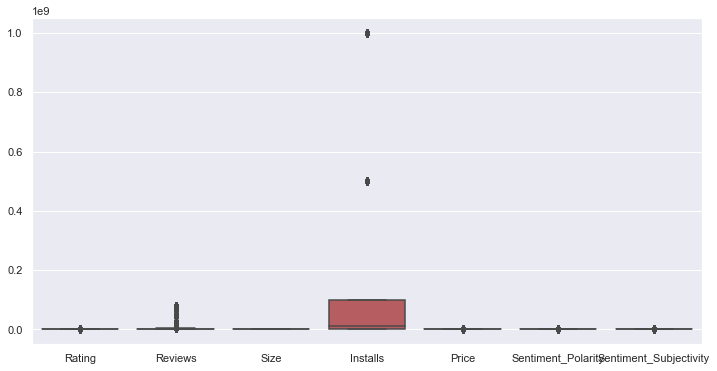

In [38]:
plt.figure(figsize= (12, 6))

sns.boxplot(data= final_data)

<AxesSubplot:xlabel='Sentiment_Polarity'>

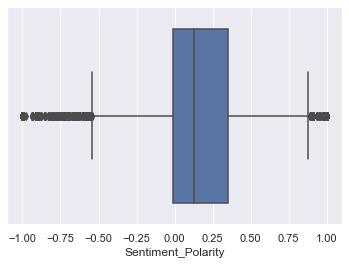

In [39]:
sns.boxplot(data= final_data, x = "Sentiment_Polarity")

<AxesSubplot:xlabel='Sentiment_Subjectivity'>

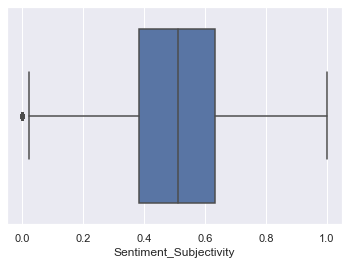

In [40]:
sns.boxplot(data = final_data, x = "Sentiment_Subjectivity")

<AxesSubplot:xlabel='Rating'>

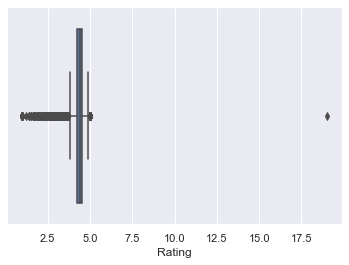

In [41]:
sns.boxplot(final_data["Rating"])

<AxesSubplot:xlabel='Type', ylabel='count'>

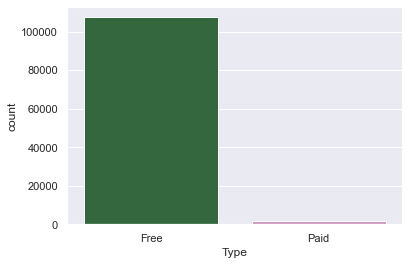

In [42]:
order = ["Free", "Paid"]
sns.countplot(data = final_data, x=  'Type', order = order, palette = 'cubehelix')

The above plot represents that there are more than 100000 Free Apps on google play store.

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

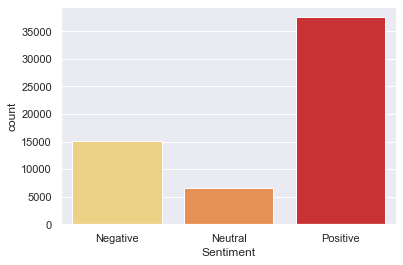

In [43]:
sns.countplot(data = final_data, x = "Sentiment", palette = "YlOrRd")

Above count plot is of Sentiment where highest count of 40000 is of Positive sentiment and lowest count of 6000 is of Neutral sentiment.

<AxesSubplot:xlabel='Sentiment', ylabel='Sentiment_Polarity'>

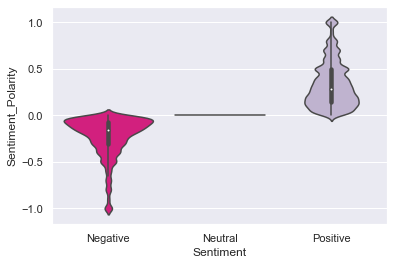

In [44]:
sns.violinplot(data = final_data, x = "Sentiment", y = "Sentiment_Polarity", palette = "Accent_r")

The above graph is representation of sentiment vs sentiment polarity:
Each violin plot represents a different value of sentiment and shows the distribution of sentiment polarity values for that group.

1. The negative sentiment ranges from 0.0 to -1.0 in sentiment polarity. 
2. Neutral sentiment represent 0.0 for sentiment polarity. 
3. Positive sentiment ranges from 0.0 to 1.0 for sentiment polaritypolarity.

<AxesSubplot:xlabel='Sentiment', ylabel='Sentiment_Subjectivity'>

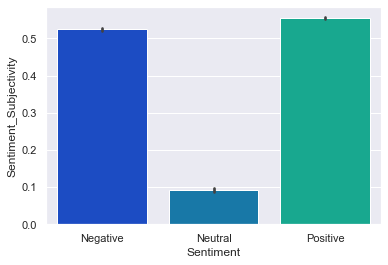

In [45]:
sns.barplot(data = final_data, x = "Sentiment", y = "Sentiment_Subjectivity", palette= "winter")

Above bar plot is Sentiment VS Sentiment subjectivity, here Positive sentiment have more than 0.5 Sentiment Subjectivity.

In [46]:
category= final_data["Category"].value_counts().reset_index().rename(columns = {"index": "Categories", "Category": "Count of Apps"})

In [47]:
category.head(10)

,Categories,Count of Apps
0,GAME,26940
1,FAMILY,11004
2,SPORTS,5459
3,PHOTOGRAPHY,5316
4,PRODUCTIVITY,5002
5,HEALTH_AND_FITNESS,4629
6,DATING,4471
7,COMMUNICATION,4325
8,TOOLS,4020
9,TRAVEL_AND_LOCAL,3700


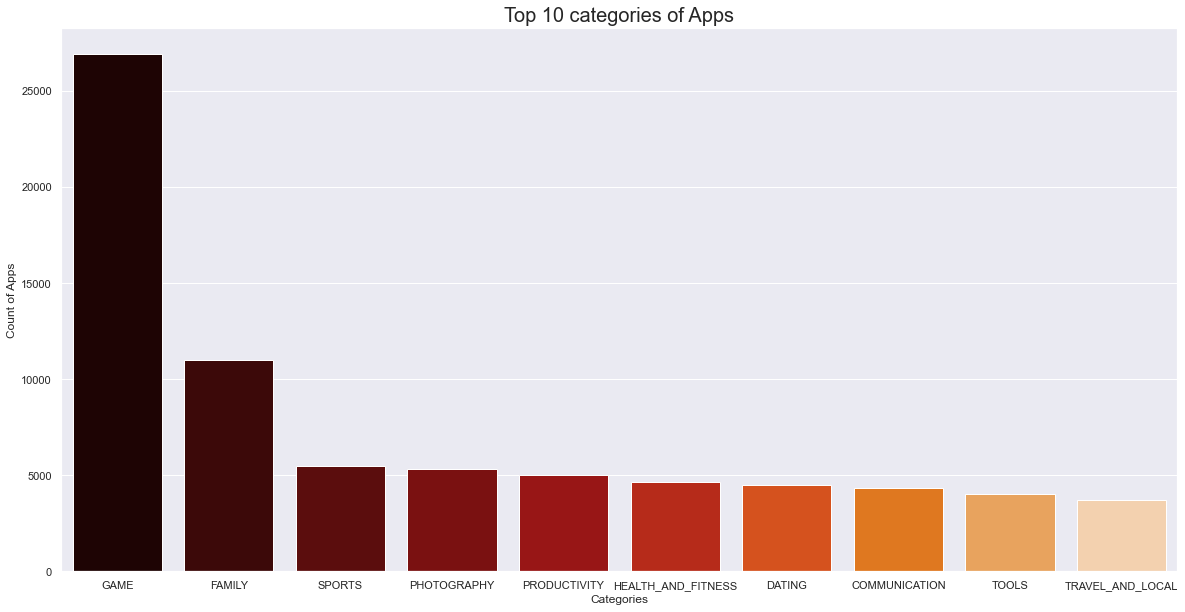

In [48]:
plt.figure(figsize= (20, 10))

sns.barplot(data= category.head(10),
            x = "Categories", y = "Count of Apps",
            palette = "gist_heat")
plt.title("Top 10 categories of Apps", fontsize = "20")
plt.show()

The above plot is count of top 10 categories of apps and the highest number of apps are Category of Games, lowest number of apps are of Travel and local.

In [49]:
rating = final_data.groupby(['Content Rating', 'Rating']).size().reset_index().rename(columns = {0: "Rating Count"})

In [50]:
rating.head()

,Content Rating,Rating,Rating Count
0,Adults only 18+,3.8,1
1,Adults only 18+,4.5,40
2,Adults only 18+,4.6,1
3,Everyone,1.0,15
4,Everyone,1.2,1


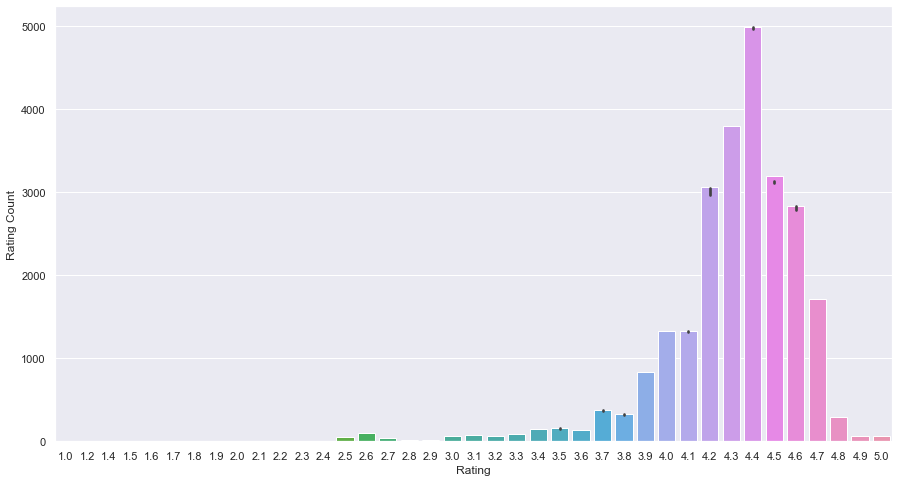

In [51]:
a = sns.barplot(data = rating, x = "Rating", y = "Rating Count", ci = 2)
a.figure.set_size_inches(15, 8)

From the above plot we can observe that highest Rating Count is 5000 and Rating given by users is at 4.4 .

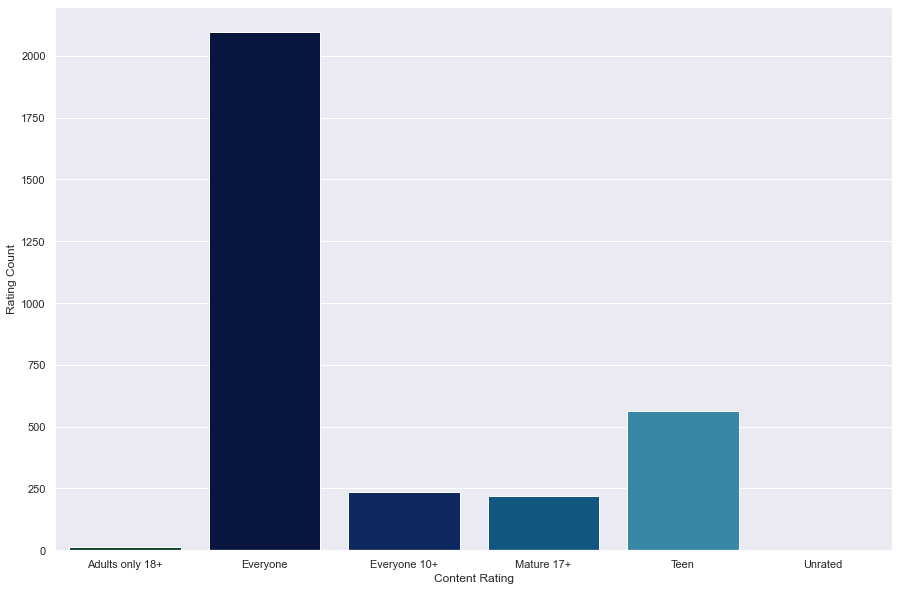

In [52]:
b = sns.barplot(data = rating, x = 'Content Rating', y = 'Rating Count', ci = 0, palette = "ocean")
b.figure.set_size_inches(15, 10)

The above bar plot shows us that Everyone category users has Rating Count more than 2000.

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

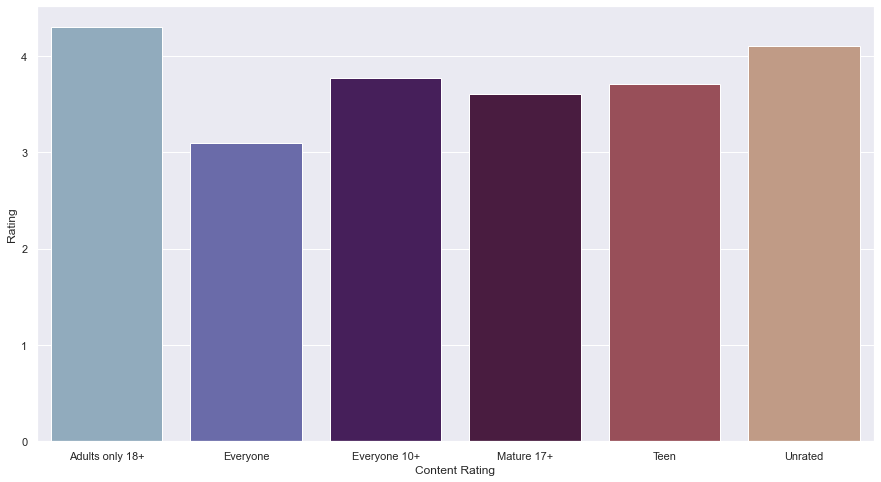

In [53]:
plt.figure(figsize = (15, 8))
sns.barplot(data= rating, x = "Content Rating", y = "Rating", palette = "twilight", ci = 0)

THe above plot of Content Rating VS Rating conclude that the category of 'Adults only 18+' has given Rating approximately of 4.5, where as the lowest Rating of 3.1 is given by the category of 'Everyone'.